In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="white", color_codes=True)

import numpy.random as random
import scipy.optimize as optimize

import sys
sys.path.append("..")

In [0]:
#from data_mining.SVM import SVM
from sklearn import svm

In [0]:
seed=123456
random.seed(seed)

In [4]:
X=np.array([[1,0.8],
      [1.2,0.7],
       [1.5,1.4],
       [2, 1.6],
       [3, 2.85],
    [0.9,1.2],
    [1.4,1.5],
    [1.3,1.7],
    [1.9,2],
    [2.9,3.1]
  ])

Y = np.array([ 1,1,1,1,1,-1,-1,-1,-1,-1],dtype=np.double)
print(X)
print(X[:,1])

[[1.   0.8 ]
 [1.2  0.7 ]
 [1.5  1.4 ]
 [2.   1.6 ]
 [3.   2.85]
 [0.9  1.2 ]
 [1.4  1.5 ]
 [1.3  1.7 ]
 [1.9  2.  ]
 [2.9  3.1 ]]
[0.8  0.7  1.4  1.6  2.85 1.2  1.5  1.7  2.   3.1 ]


In [5]:
X.shape

(10, 2)

In [6]:
len(X),len(Y)

(10, 10)

In [0]:
data=pd.DataFrame(X,columns=["x1","x2"])
data["y"]=Y

In [0]:
data_true=data[data["y"]==1]
data_false=data[data["y"]==-1]

In [9]:
data_true

,x1,x2,y
0,1.0,0.80,1.0
1,1.2,0.70,1.0
2,1.5,1.40,1.0
3,2.0,1.60,1.0
4,3.0,2.85,1.0


Text(0, 0.5, 'x2')

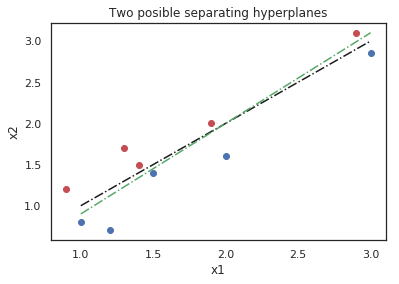

In [10]:
fig, ax = plt.subplots()
ax.plot(data_true["x1"],data_true["x2"],"o",color="b")
ax.plot(data_false["x1"],data_false["x2"],"o",color="r")
ax.plot([1,3],[1,3],"-.",color="k")
ax.plot([1,3],[0.9,3.1],"-.",color="g")
ax.set_title("Two posible separating hyperplanes")
ax.set_xlabel("x1")
ax.set_ylabel("x2")

## Optimization with Hinge Loss

In [0]:
def hinge_error(x,y,W,b):
    return max(0,1-y*(np.dot(W.T,x)+b))

def hinge_gradient(x,y,W,b):
    e=y*(np.dot(W.T,x)+b)
    if e<1.0:
        return -y*x,-y
    else:
        return np.zeros_like(x),0
    
def classification_error(X,Y,W,b):
    N=len(X)
    sum=0.0
    for i in range(N):
        sum+=hinge_error(X[i],Y[i],W,b)
    return sum/N

In [0]:
W0=np.array([1.,-1.])
b0=0.2

In [13]:
np.dot(W0.T,X[0])+b0

0.39999999999999997

In [14]:
hinge_error(X[0],Y[0],W0,b0)

0.6000000000000001

In [0]:
hinge_gradient(X[0],Y[0],W0,b0)

(array([-1. , -0.8]), -1.0)

In [0]:
x1h=np.zeros(100)
x2h=np.linspace(-2,2,100)
xh=np.vstack((x1h,x2h)).T
print(xh.shape)
yh=np.ones(100)
err=np.zeros(100)
for i in range(100):
    err[i]=hinge_error(xh[i],yh[i],W0,b0)

(100, 2)


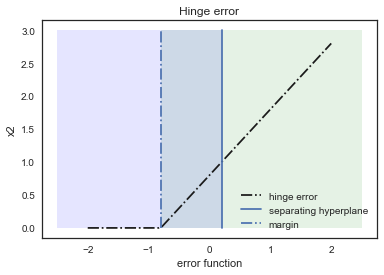

In [0]:
x2_0=-b0/W0[1]
x2_m=(1-b0)/W0[1]
fig, ax = plt.subplots()
ax.plot(x2h,err,"-.",color="k",label="hinge error")
ax.plot([x2_0,x2_0],[0,3],"-",color="b",label="separating hyperplane")
ax.plot([x2_m,x2_m],[0,3],"-.",color="b",label="margin")
ax.fill_betweenx([0,3], x2_m, 2.5, facecolor='green',alpha=0.1)
ax.fill_betweenx([0,3], -2.5,x2_0, facecolor='blue',alpha=0.1)
ax.set_title("Hinge error")
ax.set_xlabel("error function")
ax.set_ylabel("x2")
ax.legend()

In [0]:
def train_epoch(X,Y,W,b,weight_penalty,learning_rate):
    N=len(X)
    perm=random.permutation(N)
    for i in perm:
        gradW,gradb=hinge_gradient(X[i],Y[i],W,b)
        #print("gradW",gradW)
        #print("gradb",gradb)
        
        W-=learning_rate/N*gradW
        W*=(1-weight_penalty)
        b[0]-=learning_rate/N*gradb

def train(X,Y,W,b,weight_penalty,learning_rate,epochs=100):
    for e in range(epochs):
        train_epoch(X,Y,W,b,weight_penalty,learning_rate)
        if (e%(epochs//10)==0):
            err=classification_error(X,Y,W,b)
            W_l2=np.dot(W.T,W)
            objective=err+weight_penalty/2.0*W_l2
            print(e,objective,err,W_l2)

In [0]:
W=np.array([0.0,0.0])
b=np.array([2.0])

In [0]:
train(X,Y,W,b,0.000000000001,0.02,30000)

0 [1.462838] [1.462838] 0.0006432399999913882
3000 [0.235759] [0.235759] 32.99491762574257
6000 [0.12677002] [0.12677002] 67.74020434991978
9000 [0.06637101] [0.06637101] 101.58720496029102
12000 [0.04283801] [0.04283801] 125.57512315637231
15000 [0.02890102] [0.02890102] 146.37473198467694
18000 [0.01695902] [0.01695902] 167.52060513791275
21000 [0.00502303] [0.00502303] 190.08071960578826
24000 1.0092740865795438e-10 0.0 201.85481731590878
27000 1.0092740260234802e-10 0.0 201.85480520469605


In [0]:
W

array([ 10.02879767, -10.06369765])

In [0]:
b[0]

0.04599999999999835

In [0]:
x0=np.linspace(0.9,3.1,100)
x0=np.linspace(0.9,3.1,100)
y0=-(W[0]*x0+b)/W[1]
yp=-(W[0]*x0+b+1)/W[1]
ym=-(W[0]*x0+b-1)/W[1]

Text(0,0.5,'x2')

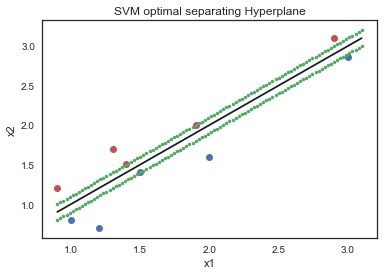

In [0]:

fig, ax = plt.subplots()
ax.plot(data_true["x1"],data_true["x2"],"o",color="b")
ax.plot(data_false["x1"],data_false["x2"],"o",color="r")
ax.plot(x0,y0,"-",color="k")
ax.plot(x0,yp,".",color="g")
ax.plot(x0,ym,".",color="g")
ax.set_title("SVM optimal separating Hyperplane")
ax.set_xlabel("x1")
ax.set_ylabel("x2")

## Comparison to sklearn

In [0]:
model=svm.SVC(C=100000000,kernel="linear") 
model.fit(X, Y)

SVC(C=100000000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [0]:
w=model.coef_[0]
w

array([ 9.99771334, -9.99847874])

In [0]:
b=model.intercept_[0]
b

0.0011656549268842659

In [0]:
x0=np.linspace(0.9,3.1,100)
y0=-(w[0]*x0+b)/w[1]
yp=-(w[0]*x0+b+1)/w[1]
ym=-(w[0]*x0+b-1)/w[1]

Text(0,0.5,'x2')

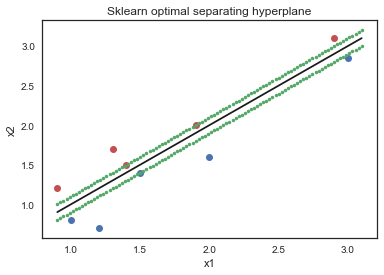

In [0]:
fig, ax = plt.subplots()
ax.plot(data_true["x1"],data_true["x2"],"o",color="b")
ax.plot(data_false["x1"],data_false["x2"],"o",color="r")
ax.plot(x0,y0,"-",color="k")
ax.plot(x0,yp,".",color="g")
ax.plot(x0,ym,".",color="g")
ax.set_title("Sklearn optimal separating hyperplane")
ax.set_xlabel("x1")
ax.set_ylabel("x2")

## Non Linear Classification Problem

In [0]:
N=15
R=1.0
DR=0.1
theta=np.linspace(0,2*np.pi,N)
dr=random.normal(loc=0.0,scale=DR,size=N)
y=np.sign(dr)
dr+=DR*y # add a margin
x1=(R+dr)*(0.5*np.cos(theta)+1*np.sin(theta))
x2=(R+dr)*(0.5*np.sin(theta)+1*np.cos(theta))
x=np.vstack((x1,x2)).T

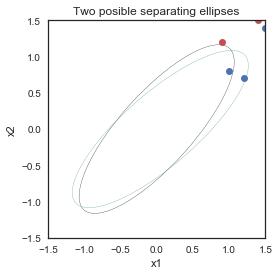

In [0]:
from matplotlib.patches import Ellipse

fig, ax = plt.subplots()

ax.plot(data_true["x1"],data_true["x2"],"o",color="b")
ax.plot(data_false["x1"],data_false["x2"],"o",color="r")
ellipse1=Ellipse((0,0), width=3, height=1, angle=48,fill=False)
ax.add_artist(ellipse1)
ellipse2=Ellipse((0.05,0), width=3.1, height=1, angle=41,fill=False,color="g")
ax.add_artist(ellipse2)
#ax.plot(x0,yp,".",color="g")
#ax.plot(x0,ym,".",color="g")
ax.set_title("Two posible separating ellipses")
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_xlim([-1.5,1.5])
ax.set_ylim([-1.5,1.5])
ax.set_aspect('equal')

### Method1:  Add nonlinear terms to regression

In [0]:
data=pd.DataFrame(x,columns=["x1","x2"])
data["x1*x1"]=data["x1"]**2
data["x2*x2"]=data["x2"]**2
data["2*x1*x2"]=2*data["x1"]*data["x2"]
data["y"]=y
data_true=data[data["y"]==1.0]
data_false=data[data["y"]==-1.0]
data

,x1,x2,x1*x1,x2*x2,2*x1*x2,y
0,0.436965,0.873931,0.190939,0.763755,0.763755,-1.0
1,0.793941,1.003603,0.630342,1.007219,1.593603,-1.0
2,0.933552,0.865966,0.871519,0.749897,1.616848,-1.0
3,0.847490,0.553960,0.718239,0.306872,0.938951,-1.0
4,0.745110,0.228574,0.555189,0.052246,0.340625,-1.0
5,0.631890,-0.312626,0.399285,0.097735,-0.395090,1.0
6,-0.014168,-0.583803,0.000201,0.340826,0.016543,-1.0
7,-0.636987,-1.273973,0.405752,1.623007,1.623007,1.0
8,-0.994782,-1.257483,0.989592,1.581264,2.501844,1.0
9,-0.943559,-0.875249,0.890304,0.766061,1.651699,-1.0


In [0]:
X=data.as_matrix(["x1","x2","x1*x1","x2*x2","2*x1*x2"])
Y=data["y"]

In [0]:
W=np.array([0.,0.,0.,0.,0.])
b=[0.0]

In [0]:
train(X,Y,W,b,0.0000000000001,0.02,30000)

0 [0.99458139] [0.99458139] 6.392779320242342e-05
3000 [0.3778252] [0.3778252] 11.157841718864823
6000 [0.25148889] [0.25148889] 32.36560221534339
9000 [0.13748258] [0.13748258] 64.08287267966642
12000 [0.04794913] [0.04794913] 101.82168035535773
15000 [0.00698487] [0.00698487] 132.81727225910134
18000 7.02841357356908e-12 0.0 140.5682714713816
21000 7.0284135103007274e-12 0.0 140.56827020601455
24000 7.0284134470323756e-12 0.0 140.5682689406475
27000 7.028413383764023e-12 0.0 140.56826767528045


In [0]:
W,b[0]

(array([-1.14263153,  0.47572244,  6.35486215,  8.01297467, -5.86892766]),
 -3.767999999999851)

In [0]:
N=100
x1=np.linspace(-1.6,1.8,N)
x2=np.linspace(-1.6,1.8,N)
Xd=np.empty((N*N,5))

for i1 in range(N):
    for i2 in range(N):
       Xd[i1+i2*N]=(x1[i1],x2[i2],x1[i1]*x1[i1],x2[i2]*x2[i2],2*x1[i1]*x2[i2])

x1m,x2m=np.meshgrid(x1,x2)
L=np.dot(W,Xd.T)+b[0]
L=L.reshape(N,N)


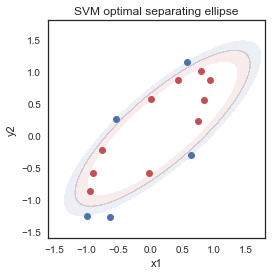

In [0]:
fig, ax = plt.subplots()
ax.contourf(x1m,x2m,L,[-1.0,0.0],alpha=0.1,colors=["r"])
ax.contourf(x1m,x2m,L,[0.0,1.0],alpha=0.1,colors=["b"])
ax.contourf(x1m,x2m,L,[-0.02,0.02],alpha=0.1,colors=["k"])
ax.plot(data_true["x1"],data_true["x2"],"o",color="b")
ax.plot(data_false["x1"],data_false["x2"],"o",color="r")
ax.set_title("SVM optimal separating ellipse")
ax.set_xlabel("x1")
ax.set_ylabel("y2")
ax.set_aspect('equal')